# Web Scraping Job Vacancies - Web Scraping Data Analysis Case Study

## Introduction

In this project, we'll build a web scraper to extract job listings from a popular job search platform. We'll extract job titles, companies, locations, job descriptions, and other relevant information.

Here are the main steps we'll follow in this project:

1. Setup our development environment
2. Understand the basics of web scraping
3. Analyze the website structure of our job search platform
4. Write the Python code to extract job data from our job search platform
5. Save the data to a CSV file
6. Test our web scraper and refine our code as needed

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and HTML structure. In addition, you may want to use the following packages in your Python environment:

- requests
- BeautifulSoup
- csv
- datetime

These packages should already be installed in Coursera's Jupyter Notebook environment, however, if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install requests`
- `!pip install BeautifulSoup`

## Step 1: Importing Required Libraries 
For this task, you will gather the required libraries to include in your application to write the code.
Here, we are importing the following required libraries: *csv* for writing data to a CSV file, *datetime* for getting the current date, requests for sending HTTP requests to the website, *BeautifulSoup* for parsing the HTML source code of the webpage, and time for introducing a delay in our program.
This is usually done at the top of the file, for example: from datetime import datetime
##### Resources:
importing modules from a package -- Python.org

## Step 2: Understand the basics of web scraping
Scraping job listings can be a valuable way to gather data for analysis, but it's essential to consider the legal and ethical implications, as well as the terms of service of the websites you intend to scrape. Many popular job search platforms have terms of service that prohibit or restrict web scraping. For instance, platforms like Indeed, LinkedIn, and Glassdoor have been known to enforce anti-scraping measures and have taken legal action against unauthorized data extraction. It's crucial to review each platform's terms of service to understand their specific policies regarding data extraction. For this reason, I will be searching for an open data platform where I can get a dataset useful for my project needs. 

## Step 3: Find Open Data Platforms
As I mentioned in Step 2, identifying companies that explicitly permit web scraping can be challenging, as many organizations have policies that restrict automated data extraction. However, some platforms are more lenient or even encourage data extraction through APIs or open data initiatives. I choose the European Union Open Data Portal (EUODP) to extract job listings from. The European Union Open Data Portal provides structured datasets that can be used for analysis, making it a legal and ethical source for job data. Let's do it!


## Method 1 (Warm-Up): Download or Access the dataset via API
I will try the analysis using multiple methods. As Method 1 I will download the dataset and then load it using Pandas. We can think of this method as a "warm-up" step before an actual webscraping data analysis.

For Method 2, I will try actually to scrape a dataset from a job vacancy portal. I might also consider doing web scraping for a completely different website. Let's see.

The dataset I am going to use is "Open job vacancies by Infrabel". I am going to download the .csv file (CSV uses a semicolon (;) as a separator.).

## Step 4: Data Preparation - Load the data into Python

In [25]:
# Use pandas to load and inspect the dataset
# import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np
file_path = 'D:/Courses_for_development/Portfolio_DataAnalysis_projects/WebScraping_DataAnalysisProject_Coursera/joblistinfrabel.csv' 
job_list = pd.read_csv(file_path, sep = ';')
# preview the first few rows
job_list.head()

,Job title FR,Job title NL,Job Id,Language role,Type,Type.1,Type.2,Apply,Publication date,Address,Postal code,Municipality,Geo Shape,Geo Punt,Street name,Number,Street suffix,street_name_with_number,Province
0,Stage - Agent de l'usinage spécialisé - Second...,NaN,12282,FR,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2023-09-03,NaN,7160,Chapelle-Lez-Herlaimont,"{""coordinates"": [[[4.282609610000065, 50.45161...","50.471307819925876, 4.282857249459756",NaN,NaN,NaN,NaN,Hainaut
1,Stage - Technicien.ne Bâtiments et Ouvrages d'...,NaN,19323,FR,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2022-03-09,NaN,7000,Mons,"{""coordinates"": [[[3.927831612000034, 50.45177...","50.456203480863934, 3.9685021666591336",NaN,NaN,NaN,NaN,Hainaut
2,NaN,Stage - Technieker Spoorwerken - Middelbaar,24803,NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2024-08-25,NaN,1500,Halle,"{""coordinates"": [[[4.307960834000028, 50.70021...","50.73071382505011, 4.240277878728712",NaN,NaN,NaN,NaN,Vlaams-brabant
3,NaN,Stage - Roestvorming sporen - Middelbaar/Gradu...,27033,NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2024-07-18,NaN,8000,Brugge,"{""coordinates"": [[[3.17317964700004, 51.226111...","51.232646001171425, 3.2071828570336303",NaN,NaN,NaN,NaN,West-Vlaanderen
4,Stage - Analyse Software Requirements - Master,Stage - Analyse Software Requirements - Master,27850,FR/NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2025-01-06,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel


## Step 5: Data Cleaning - Clean & Process the Data
What does the "cleaning data" step contains? It may contain:
- standardize column names (fix structural errors), 
- filtering the information needed,
- finding missing data,
- removing duplicates, 
- finding anomalies (find unwanted outliers), etc.

## List column names and Null values
To clean the dataset I wanted to first know how much null value we have for each column. So, I listed columns and summed up nulls in each column.

In [6]:
# list(job_list.columns) # listing column names 
# column = ['Job title  FR','Job title NL','Job Id','Language role','Type','Type.1','Type.2','Apply','Publication date','Address','Postal code','Municipality','Geo Shape','Geo Punt','Street name','Number','Street suffix',' street_name_with_number','Province']
# list(job_list.isnull().sum()) # list the number of null values for each column, without column names.
# len(job_list) # gives the number of rows
job_list.isnull().sum() # adding up all null values in each column


Job title  FR               121
Job title NL                 35
Job Id                        0
Language role                 0
Type                          0
Type.1                        0
Type.2                        0
Apply                         0
Publication date              0
Address                     147
Postal code                   0
Municipality                  0
Geo Shape                     0
Geo Punt                      0
Street name                 147
Number                      147
Street suffix               147
 street_name_with_number    147
Province                      0
dtype: int64

##### Challenge that I faced:
While checking for null values in each row, I noticed that the column name "Job title   FR" had an extra space between "title" and "FR." This wasn’t immediately visible, but it caused issues during the analysis. When I tried to check for missing values in this column only, I kept running into an error without understanding why. Similar problem is the case for the column name 
" street_name_with_number" which has an extra space in the beginning of the text (check the list of column names above).

At first glance, this might seem like a minor typo, but small formatting inconsistencies like this can be frustrating and time-consuming to debug, especially after working on a project all day when exhaustion kicks in.

Now, it's time to fix the issue by removing the extra space. I’ll also make formatting adjustments to the r columns to ensure consistency and readibility.

In [15]:
job_list.columns = job_list.columns.str.replace(' ', '')
job_list.columns
#list(job_list.columns)
#df.columns = df.columns.str.replace(' ', '') 
# changing column names for consistency:
new_job_list = job_list.rename({'JobtitleFR': 'JobTitleFR', 'JobtitleNL': 'JobTitleNL', 
                                'JobId': 'Job ID', 'Languagerole': 'Language Role',
                                'Type.1': 'Type 1', 'Type.2': 'Type 2',
                                'Publicationdate': 'PublicationDate', 'Streetname': 'StreetName',
                                'Streetsuffix': 'StreetSuffix',
                                'street_name_with_number': 'StreetNameWithNumber'}, axis=1)
new_job_list
#list(new_job_list.columns)


,JobTitleFR,JobTitleNL,Job ID,Language Role,Type,Type 1,Type 2,Apply,PublicationDate,Address,Postalcode,Municipality,GeoShape,GeoPunt,StreetName,Number,StreetSuffix,StreetNameWithNumber,Province
0,Stage - Agent de l'usinage spécialisé - Second...,NaN,12282,FR,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2023-09-03,NaN,7160,Chapelle-Lez-Herlaimont,"{""coordinates"": [[[4.282609610000065, 50.45161...","50.471307819925876, 4.282857249459756",NaN,NaN,NaN,NaN,Hainaut
1,Stage - Technicien.ne Bâtiments et Ouvrages d'...,NaN,19323,FR,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2022-03-09,NaN,7000,Mons,"{""coordinates"": [[[3.927831612000034, 50.45177...","50.456203480863934, 3.9685021666591336",NaN,NaN,NaN,NaN,Hainaut
2,NaN,Stage - Technieker Spoorwerken - Middelbaar,24803,NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2024-08-25,NaN,1500,Halle,"{""coordinates"": [[[4.307960834000028, 50.70021...","50.73071382505011, 4.240277878728712",NaN,NaN,NaN,NaN,Vlaams-brabant
3,NaN,Stage - Roestvorming sporen - Middelbaar/Gradu...,27033,NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2024-07-18,NaN,8000,Brugge,"{""coordinates"": [[[3.17317964700004, 51.226111...","51.232646001171425, 3.2071828570336303",NaN,NaN,NaN,NaN,West-Vlaanderen
4,Stage - Analyse Software Requirements - Master,Stage - Analyse Software Requirements - Master,27850,FR/NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2025-01-06,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Team Lead buying Teams,Team Lead buying Teams,32799,FR/NL,"Supply chain, Logistique & Procurement","Supply chain, Logistiek & Procurement","Supply chain, Logistionk & Procurement",https://career2.successfactors.eu/sfcareer/job...,2024-12-18,RUE DE FRANCE 85 1060A BRUXELLES,1060,Saint-Gilles,"{""coordinates"": [[[[4.356308510000076, 50.8347...","50.8349603, 4.3326534",RUE DE FRANCE,85,A,85 RUE DE FRANCE,Bruxelles-Brussel
189,Company Lawyer,NaN,32845,FR,Finance & Legal,Finance & Legal,Finance & Legal,https://career2.successfactors.eu/sfcareer/job...,2025-01-16,PLACE MARCEL BROODTHAERS 2 1060A BRUXELLES,1060,Saint-Gilles,"{""coordinates"": [[[[4.356308510000076, 50.8347...","50.8354886, 4.3382346",PLACE MARCEL BROODTHAERS,2,A,2 PLACE MARCEL BROODTHAERS,Bruxelles-Brussel
190,Realtime Analyst - Central Dispatch,NaN,32928,FR,Sécurité & Gestion du Trafic,Veiligheid & Traffic Management,Safety & Traffic Management,https://career2.successfactors.eu/sfcareer/job...,2025-01-17,NaN,1000,Bruxelles,"{""coordinates"": [[[[4.368122588000062, 50.8148...","50.822325604082216, 4.377065860435226",NaN,NaN,NaN,NaN,Bruxelles-Brussel
191,Realtime Analyst - Central Dispatch,NaN,32928,FR,Sécurité & Gestion du Trafic,Veiligheid & Traffic Management,Safety & Traffic Management,https://career2.successfactors.eu/sfcareer/job...,2025-01-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.360463225000046, 50.90117...","50.87298266192055, 4.375234148039785",NaN,NaN,NaN,NaN,Bruxelles-Brussel


## Filter job listing for Bruxelles only

In [16]:
jobsinb = new_job_list.loc[job_list['Municipality'] == 'Bruxelles'] # access only the rows that have a specific data. Focus on a specific rows.
len(jobsinb)
#jobsinb

27

## Handling Missing Values: Detect & Remove NaN values
##### Idea: 
In Pandas, missing values are represented by None or NaN, which can occur due to uncollected data or incomplete entries. To identify and handle the missing values, Pandas provides two useful functions: isnull() and notnull(). These functions help detect whether a value is NaN or not, making it easier to clean and preprocess data in a DataFrame.

##### Application: 
I want to remove null values for Job titles first, because later I will check what is the most in-demand job (title) in Bruxelles. First I need to detect rows with missing values or nulls for Bruxelles.

##### Observations: 
number of total null values in column "Job title NL" for the whole dataset is 35. But if we restrict ourselves only to the Municipality Bruxelles (which is rather smaller dataset), the number of nulls drops to 9 which is plausable.

Now, what remains is to drop those rows with nulls and do the analysis of jobs considering the corresponding column.

##### Observations: 
num. of rows for Bruxelles was 27, after dropping 9-null job titles, we should remain 18 rows in total (which is the case, check Removing NaNs section below).

## Detecting NaNs
### Filtering Data Based on Missing Values

In this case, the isnull() function is applied to the “Job title NL” column to filter and display rows with missing job title information in NL.
##### Question: 
The filtering did not work for the "Job title FR" column for some reason. Answer to this question is addressed in the section *Step 5: Data Cleaning - Clean & Process the Data -> List column names and Null values* above.

In [17]:
#pd.isna(job_list['Job title NL'])
# jobsinb[jobsinb.loc[ :,['Job title NL', 'Job title FR']].isnull().sum(axis=1)==2]

null_job_titles = jobsinb[jobsinb['JobTitleNL'].isnull()]
#len(null_job_titles)
null_job_titles.head()

,JobTitleFR,JobTitleNL,Job ID,Language Role,Type,Type 1,Type 2,Apply,PublicationDate,Address,Postalcode,Municipality,GeoShape,GeoPunt,StreetName,Number,StreetSuffix,StreetNameWithNumber,Province
5,Bachelier.ere Technicien.ne Electromécanicien.ne,NaN,30284,FR,Technicien,Technieker,Technician,https://career2.successfactors.eu/sfcareer/job...,2024-07-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel
37,Technicien.ne Electromécanicien.ne,NaN,30297,FR,Technicien,Technieker,Technician,https://career2.successfactors.eu/sfcareer/job...,2024-07-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel
70,Bachelier.ere Technicien.ne Electromécanicien.ne,NaN,30284,FR,Technicien,Technieker,Technician,https://career2.successfactors.eu/sfcareer/job...,2024-07-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.360463225000046, 50.90117...","50.87298266192055, 4.375234148039785",NaN,NaN,NaN,NaN,Bruxelles-Brussel
115,Realtime Analyst - Central Dispatch,NaN,32928,FR,Sécurité & Gestion du Trafic,Veiligheid & Traffic Management,Safety & Traffic Management,https://career2.successfactors.eu/sfcareer/job...,2025-01-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel
124,Bachelier.ere Technicien.ne Electromécanicien.ne,NaN,30284,FR,Technicien,Technieker,Technician,https://career2.successfactors.eu/sfcareer/job...,2024-07-17,NaN,1000,Bruxelles,"{""coordinates"": [[[[4.368122588000062, 50.8148...","50.822325604082216, 4.377065860435226",NaN,NaN,NaN,NaN,Bruxelles-Brussel


### Removing NaNs
Dropping missing values explained: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

Since we are checking job titles specifically for Bruxelles, the dataset is not huge and contains only 18 rows after dropping nulls. 
Lets see if the dataset will become even smaller by checking if we have duplicates.

In [18]:
# clean/drop nulls in a specific column
jobs = jobsinb.dropna(subset = ['JobTitleNL'])
jobs.head()
# len (jobs)

,JobTitleFR,JobTitleNL,Job ID,Language Role,Type,Type 1,Type 2,Apply,PublicationDate,Address,Postalcode,Municipality,GeoShape,GeoPunt,StreetName,Number,StreetSuffix,StreetNameWithNumber,Province
4,Stage - Analyse Software Requirements - Master,Stage - Analyse Software Requirements - Master,27850,FR/NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2025-01-06,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel
45,NaN,Stage - Projectmedewerker Competentiewijzer vo...,31716,NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2024-06-21,NaN,1000,Bruxelles,"{""coordinates"": [[[4.360463225000046, 50.90117...","50.87298266192055, 4.375234148039785",NaN,NaN,NaN,NaN,Bruxelles-Brussel
62,NaN,Realtime Analyst - Central Dispatch,32923,NL,Sécurité & Gestion du Trafic,Veiligheid & Traffic Management,Safety & Traffic Management,https://career2.successfactors.eu/sfcareer/job...,2025-01-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel
63,NaN,Realtime Analyst - Central Dispatch,32923,NL,Sécurité & Gestion du Trafic,Veiligheid & Traffic Management,Safety & Traffic Management,https://career2.successfactors.eu/sfcareer/job...,2025-01-17,NaN,1000,Bruxelles,"{""coordinates"": [[[[4.368122588000062, 50.8148...","50.822325604082216, 4.377065860435226",NaN,NaN,NaN,NaN,Bruxelles-Brussel
68,NaN,Stage - Elektromechanica - Bachelor,29817,NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2024-08-25,NaN,1000,Bruxelles,"{""coordinates"": [[[[4.368122588000062, 50.8148...","50.822325604082216, 4.377065860435226",NaN,NaN,NaN,NaN,Bruxelles-Brussel


## Checking for duplicates
Boolean value False, when we apply .duplicated() function, indicates that the corresponding row is no duplicate; It seems like we do not have duplicates, i.e no any repititve row, in this small dataset. 

In [19]:
#This code gives you a data frame indicating if a row has any repetition in the data frame:

# jobs.duplicated()
no_dup = jobs.drop_duplicates()
no_dup
# len(no_dup)

,JobTitleFR,JobTitleNL,Job ID,Language Role,Type,Type 1,Type 2,Apply,PublicationDate,Address,Postalcode,Municipality,GeoShape,GeoPunt,StreetName,Number,StreetSuffix,StreetNameWithNumber,Province
4,Stage - Analyse Software Requirements - Master,Stage - Analyse Software Requirements - Master,27850,FR/NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2025-01-06,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel
45,NaN,Stage - Projectmedewerker Competentiewijzer vo...,31716,NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2024-06-21,NaN,1000,Bruxelles,"{""coordinates"": [[[4.360463225000046, 50.90117...","50.87298266192055, 4.375234148039785",NaN,NaN,NaN,NaN,Bruxelles-Brussel
62,NaN,Realtime Analyst - Central Dispatch,32923,NL,Sécurité & Gestion du Trafic,Veiligheid & Traffic Management,Safety & Traffic Management,https://career2.successfactors.eu/sfcareer/job...,2025-01-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.357185980000054, 50.86031...","50.853812373745676, 4.369278654960959",NaN,NaN,NaN,NaN,Bruxelles-Brussel
63,NaN,Realtime Analyst - Central Dispatch,32923,NL,Sécurité & Gestion du Trafic,Veiligheid & Traffic Management,Safety & Traffic Management,https://career2.successfactors.eu/sfcareer/job...,2025-01-17,NaN,1000,Bruxelles,"{""coordinates"": [[[[4.368122588000062, 50.8148...","50.822325604082216, 4.377065860435226",NaN,NaN,NaN,NaN,Bruxelles-Brussel
68,NaN,Stage - Elektromechanica - Bachelor,29817,NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2024-08-25,NaN,1000,Bruxelles,"{""coordinates"": [[[[4.368122588000062, 50.8148...","50.822325604082216, 4.377065860435226",NaN,NaN,NaN,NaN,Bruxelles-Brussel
85,NaN,Bachelor Technieker Elektromechanica,30293,NL,Technicien,Technieker,Technician,https://career2.successfactors.eu/sfcareer/job...,2024-07-17,NaN,1000,Bruxelles,"{""coordinates"": [[[[4.368122588000062, 50.8148...","50.822325604082216, 4.377065860435226",NaN,NaN,NaN,NaN,Bruxelles-Brussel
88,NaN,Technieker Elektromechanica,30295,NL,Technicien,Technieker,Technician,https://career2.successfactors.eu/sfcareer/job...,2024-07-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.360463225000046, 50.90117...","50.87298266192055, 4.375234148039785",NaN,NaN,NaN,NaN,Bruxelles-Brussel
114,NaN,Realtime Analyst - Central Dispatch,32923,NL,Sécurité & Gestion du Trafic,Veiligheid & Traffic Management,Safety & Traffic Management,https://career2.successfactors.eu/sfcareer/job...,2025-01-17,NaN,1000,Bruxelles,"{""coordinates"": [[[4.360463225000046, 50.90117...","50.87298266192055, 4.375234148039785",NaN,NaN,NaN,NaN,Bruxelles-Brussel
120,Stage - Analyse Software Requirements - Master,Stage - Analyse Software Requirements - Master,27850,FR/NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2025-01-06,NaN,1000,Bruxelles,"{""coordinates"": [[[[4.368122588000062, 50.8148...","50.822325604082216, 4.377065860435226",NaN,NaN,NaN,NaN,Bruxelles-Brussel
121,Stage - Analyse Software Requirements - Master,Stage - Analyse Software Requirements - Master,27850,FR/NL,Étudiant,Student,Student,https://career2.successfactors.eu/sfcareer/job...,2025-01-06,NaN,1000,Bruxelles,"{""coordinates"": [[[4.360463225000046, 50.90117...","50.87298266192055, 4.375234148039785",NaN,NaN,NaN,NaN,Bruxelles-Brussel


## Results as a single .csv file - Save the processed data
Now, it is good to export the cleaned data for further use. We will use this csv file for exploratory analysis.

In [20]:
# results = pd.ExcelWriter('D:/Courses_for_development/Portfolio_DataAnalysis_projects/WebScraping_DataAnalysisProject_Coursera/cleanedJobs.xlsx')

# jobs.to_excel(results, sheet_name = 'Job Title List')
# results.close()
jobs.to_csv("D:/Courses_for_development/Portfolio_DataAnalysis_projects/WebScraping_DataAnalysisProject_Coursera/cleaned_job_listings.csv", index=False)


## Step 6: Exploratory Data Analysis (EDA)
Since I am done with the cleaning process (it didn't take much time as the dataset was not too huge), it is now time to do some analysis with the remaining data.
This may contain:
- Identifying most in-demand job titles
- Finding top hiring companies
- Analyzing salary trends (if available)
- Visualizing results with Matplotlib/Seaborn, etc.

The dataset that I chose to use, unfortunately, does not contain company and salary information, so I will skip those steps for now and continue with the other two steps. Analysis of those two will be left for later where I will now choose much better dataset for my project.


## Identifying most in-demand jobs
If we were conducting this analysis using SQL, we would first use GROUP BY to categorize job titles, then apply SUM() or COUNT() to determine their frequency, and finally sort the results in descending order using ORDER BY ... DESC.

In Python, the approach isn’t much different. Fortunately, Pandas provides the groupby() function, which serves a similar purpose and can be quite useful for this analysis.

    "Pandas groupby() function is a powerful tool used to split a DataFrame into groups based on one or more columns, allowing for efficient data analysis and aggregation. It follows a “split-apply-combine” strategy, where data is divided into groups, a function is applied to each group, and the results are combined into a new DataFrame. For example, if you have a dataset of sales transactions, you can use groupby() to group the data by product category and calculate the total sales for each category."

##### Observations:
After applying groupby() and count(), I noticed that each job title appeared exactly three times in the dataset, which seemed unusual at first. Initially, it looked like there were duplicates—for example, the job title "Stage - Analyse Software Requirements - Master" appeared three times in identical rows.

However…

After manually checking the table, I assumed these were duplicates, but as the function correctly indicated, they weren’t. A closer look at the "Geo Shape" column revealed that while most of the row data appeared identical, the values in this column were different, meaning these entries were actually unique. So, there are no duplicates after all!

From this, we can conclude that in Brussels, each job title appears with the same frequency (each job title is equally in-demand) on different publication dates. It might be interesting to analyze how this distribution changes over time and whether job demand fluctuates based on publication dates.  


In [21]:
# counting job titles
job_counts = jobs.groupby("JobTitleNL")["Job ID"].count()
job_counts

JobTitleNL
Bachelor Technieker Elektromechanica                                   3
Realtime Analyst - Central Dispatch                                    3
Stage - Analyse Software Requirements - Master                         3
Stage - Elektromechanica - Bachelor                                    3
Stage - Projectmedewerker Competentiewijzer voor Opleiders - Master    3
Technieker Elektromechanica                                            3
Name: Job ID, dtype: int64

### Checking for demand for jobs depending on the dates they are published.
We count the number of job listings for each date, though the jobs themselves may not all be unique.

For example, on *2024-07-17*, there are 6 job listings in total. However, three of them are for "Bachelor Technieker Elektromechanica" and the other three are for "Technieker Elektromechanica". This means that while there are six listings, they represent only two distinct job titles.

In [22]:
# sort values according to the dates
sort_dates = jobs.sort_values(by = "PublicationDate")
# find the number of jobs corresponding each date that are sorted in a ascending order
sort_dates.groupby("PublicationDate")["Job ID"].count()

PublicationDate
2024-06-21    3
2024-07-17    6
2024-08-25    3
2025-01-06    3
2025-01-17    3
Name: Job ID, dtype: int64

## Visualizing most in-demand job with Matplotlib/Seaborn
We can use Matplotlib and Seaborn to create effective visualizations. Different methods can be used here too, such as:
1. Bar Chart: Most In-Demand Job Titles
2. Time Series: Demand Trends Over Time



## Bar Chart 
If you have a count of job titles, a bar chart is a good choice. Since we have found the count of jobs, we can try bar chart.

##### Observations:
As we can also see from the chart that each job title occurs 3 times for the giving dates in Bruxelles. Then, we can conclude all are equally common jobs titles in Bruxelles.

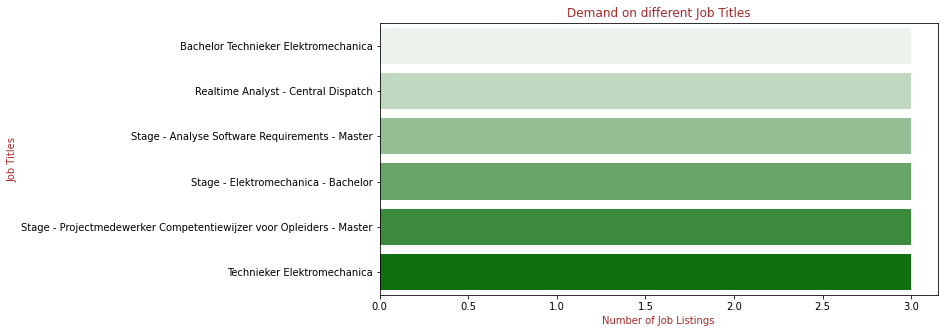

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming jobs['JobTtleNL'] contains job titles and you already counted occurrences, btw this is equivalent to the one we did above.
job_count = jobs['JobTitleNL'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=job_counts.values, y=job_counts.index, hue = job_counts.index, palette='light:green', legend = False )
plt.xlabel("Number of Job Listings", color = "brown")
plt.ylabel("Job Titles", color = "brown")
plt.title("Demand on different Job Titles", color = "brown")
plt.show()


## Time Series 
Because I have dates for job postings, I check to see how demand changes over time in Bruxelles.

For the sake of trying new method of visualizing, I will also use time series. 

##### Observations:
What we see here is what we observed when I checked for the number of jobs for each date above. That is, the number of jobs published on 2024-07-17 is 6, which shows on that very date demand for those jobs was higher compared to other dates. In fact, on other dates jobs share equal demand rate, i.e., demand for the jobs is constant/remains same over the given time period. 

Quick reminder: This results are only for Bruxelles as I filtered out other Municipalities in Step 5.

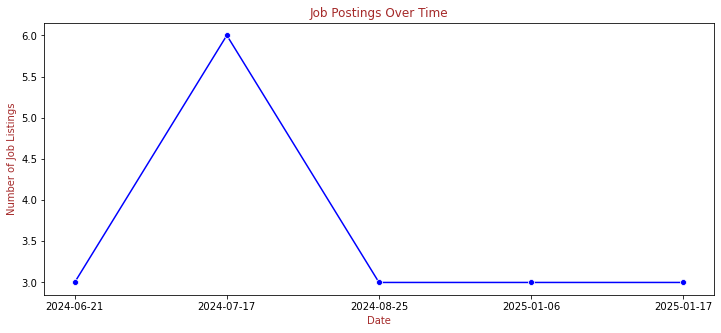

In [158]:
# Convert date column to datetime if it's not already
# jobs['Publication date'] = pd.to_datetime(jobs['Publication date'])

# Count job postings by date
job_trends = jobs.groupby('PublicationDate').size()
#job_trends

plt.figure(figsize=(12, 5))
sns.lineplot(x=job_trends.index, y=job_trends.values, marker ="o", color="blue")
plt.xlabel("Date", color = "brown")
plt.ylabel("Number of Job Listings", color = "brown")
plt.title("Job Postings Over Time", color = "brown")
plt.show()


## Conclusion & Future Work
Since this was just a "warm-up" before the actual web scraping project, the results weren’t particularly insightful. The data I used was sourced from an open platform rather than a real job search website. Additionally, the dataset lacked crucial details such as company names, salaries, job descriptions, and other relevant information. Because of this, I was limited in my analysis, only being able to examine job demand.

To make this exercise a bit more interesting, I focused on job listings from a single city. However, this further reduced the dataset size. While working with a smaller dataset is a good starting point, it didn’t feel very practical since real-world data is often much larger and more complex. Now, it's time to take on a more meaningful challenge!

For the next step, I plan to work with a dataset that includes all essential job vacancy details. This will make the data analysis more engaging, insightful, and informative. As I progress, I’ll explore additional aspects to analyze and refine my approach accordingly.


## Method 2: Actual Web Scraping Challenge
#### Done with the "warm-up", now we can "work out"!